# Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import random
import decimal

## Querying Data

In [2]:

#Read in data from the csv file using Pandas’s read_csv function
assign_DF = pd.read_csv("Data2021.csv")
#Print out data frame
assign_DF

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


# Finding which column have null value

In [3]:
sums = assign_DF.isnull().sum()
print(sums)
print("Total:", sums.sum())

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64
Total: 6819


## Doing KNN - Imputation to replace null value and rename column

In [4]:
#Enter your codes here

dfKNN= assign_DF[['Popularity','key','instrumentalness']]
imputer = KNNImputer(n_neighbors=1)
dfKNN = pd.DataFrame(imputer.fit_transform(dfKNN))
dfKNN = pd.concat([assign_DF[['Artist Name','Track Name','danceability','energy','loudness','mode','speechiness','acousticness'
                       ,'liveness','valence','tempo','duration_in min/ms','time_signature','Class']],dfKNN], axis=1, join="inner")
dfKNN.set_index("Artist Name")


,Track Name,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,0,1,2
Artist Name,,,,,,,,,,,,,,,,
Bruno Mars,That's What I Like (feat. Gucci Mane),0.854,0.564,-4.964,1,0.0485,0.017100,0.0849,0.8990,134.071,234596.0,4,5,60.0,1.0,0.001420
Boston,Hitch a Ride,0.382,0.814,-7.230,1,0.0406,0.001100,0.1010,0.5690,116.454,251733.0,4,10,54.0,3.0,0.004010
The Raincoats,No Side to Fall In,0.434,0.614,-8.334,1,0.0525,0.486000,0.3940,0.7870,147.681,109667.0,4,6,35.0,6.0,0.000196
Deno,Lingo (feat. J.I & Chunkz),0.853,0.597,-6.528,0,0.0555,0.021200,0.1220,0.5690,107.033,173968.0,4,5,66.0,10.0,0.002200
Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,0.167,0.975,-4.279,1,0.2160,0.000169,0.1720,0.0918,199.060,229960.0,4,10,53.0,2.0,0.016100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Green-House,Find Home,0.166,0.109,-17.100,0,0.0413,0.993000,0.0984,0.1770,171.587,193450.0,3,6,35.0,7.0,0.824000
Micatone,All Gone,0.638,0.223,-10.174,0,0.0329,0.858000,0.0705,0.3350,73.016,257067.0,4,2,27.0,11.0,0.000016
Smash Hit Combo,Peine perdue,0.558,0.981,-4.683,0,0.0712,0.000030,0.6660,0.2620,105.000,216222.0,4,8,34.0,4.0,0.000136


In [5]:

rename_dfKNN = dfKNN.rename({0: 'Popularity', 1: 'key', 2:'instrumentalness'}, axis=1)
rename_dfKNN

,Artist Name,Track Name,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Popularity,key,instrumentalness
0,Bruno Mars,That's What I Like (feat. Gucci Mane),0.854,0.564,-4.964,1,0.0485,0.017100,0.0849,0.8990,134.071,234596.0,4,5,60.0,1.0,0.001420
1,Boston,Hitch a Ride,0.382,0.814,-7.230,1,0.0406,0.001100,0.1010,0.5690,116.454,251733.0,4,10,54.0,3.0,0.004010
2,The Raincoats,No Side to Fall In,0.434,0.614,-8.334,1,0.0525,0.486000,0.3940,0.7870,147.681,109667.0,4,6,35.0,6.0,0.000196
3,Deno,Lingo (feat. J.I & Chunkz),0.853,0.597,-6.528,0,0.0555,0.021200,0.1220,0.5690,107.033,173968.0,4,5,66.0,10.0,0.002200
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,0.167,0.975,-4.279,1,0.2160,0.000169,0.1720,0.0918,199.060,229960.0,4,10,53.0,2.0,0.016100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,0.166,0.109,-17.100,0,0.0413,0.993000,0.0984,0.1770,171.587,193450.0,3,6,35.0,7.0,0.824000
17992,Micatone,All Gone,0.638,0.223,-10.174,0,0.0329,0.858000,0.0705,0.3350,73.016,257067.0,4,2,27.0,11.0,0.000016
17993,Smash Hit Combo,Peine perdue,0.558,0.981,-4.683,0,0.0712,0.000030,0.6660,0.2620,105.000,216222.0,4,8,34.0,4.0,0.000136
17994,Beherit,Salomon's Gate,0.215,0.805,-12.757,0,0.1340,0.001290,0.2560,0.3550,131.363,219693.0,4,8,29.0,6.0,0.916000


## Feature scaling

In [6]:

min_max_scaler = MinMaxScaler()
assign_DF[['danceability','energy','loudness','mode','speechiness','acousticness'
                       ,'liveness','valence','tempo','duration_in min/ms','time_signature','Class', 'Popularity', 'key','instrumentalness']] = min_max_scaler.fit_transform(rename_dfKNN[['danceability','energy','loudness','mode','speechiness','acousticness'
                                                                                                                                                                                           ,'liveness','valence','tempo','duration_in min/ms','time_signature','Class', 'Popularity', 'key','instrumentalness']])
assign_DF

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),0.595960,0.854745,0.563991,0.0,0.847024,1.0,0.027882,0.017169,0.001425,0.073879,0.910096,0.553969,0.158812,0.75,0.5
1,Boston,Hitch a Ride,0.535354,0.346890,0.813996,0.2,0.792166,1.0,0.019410,0.001104,0.004025,0.090173,0.569081,0.459689,0.170413,0.75,1.0
2,The Raincoats,No Side to Fall In,0.343434,0.402841,0.613992,0.5,0.765439,1.0,0.032172,0.487952,0.000196,0.386702,0.794358,0.626804,0.074240,0.75,0.6
3,Deno,Lingo (feat. J.I & Chunkz),0.656566,0.853669,0.596992,0.9,0.809161,0.0,0.035389,0.021285,0.002208,0.111426,0.569081,0.409271,0.117769,0.75,0.5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,0.525253,0.115558,0.974999,0.1,0.863607,1.0,0.207507,0.000170,0.016164,0.162028,0.075953,0.901766,0.155674,0.75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,0.343434,0.114482,0.108982,0.6,0.553223,0.0,0.020161,0.996988,0.827309,0.087542,0.163997,0.754740,0.130958,0.50,0.6
17992,Micatone,All Gone,0.262626,0.622337,0.222984,1.0,0.720895,0.0,0.011153,0.861446,0.000015,0.059306,0.327271,0.227225,0.174024,0.75,0.2
17993,Smash Hit Combo,Peine perdue,0.333333,0.536260,0.981000,0.3,0.853826,0.0,0.052225,0.000030,0.000136,0.661978,0.251834,0.398391,0.146374,0.75,0.8
17994,Beherit,Salomon's Gate,0.282828,0.167205,0.804996,0.5,0.658363,0.0,0.119571,0.001295,0.919679,0.247040,0.347938,0.539476,0.148724,0.75,0.8


# Boxplot to check for any outliers

In [7]:
outlier_check = assign_DF[['danceability','energy','loudness','mode','speechiness','acousticness'
                       ,'liveness','valence','tempo','duration_in min/ms','time_signature','Class', 'Popularity', 'key','instrumentalness']]

In [8]:
outlier_check_array = np.array(outlier_check)


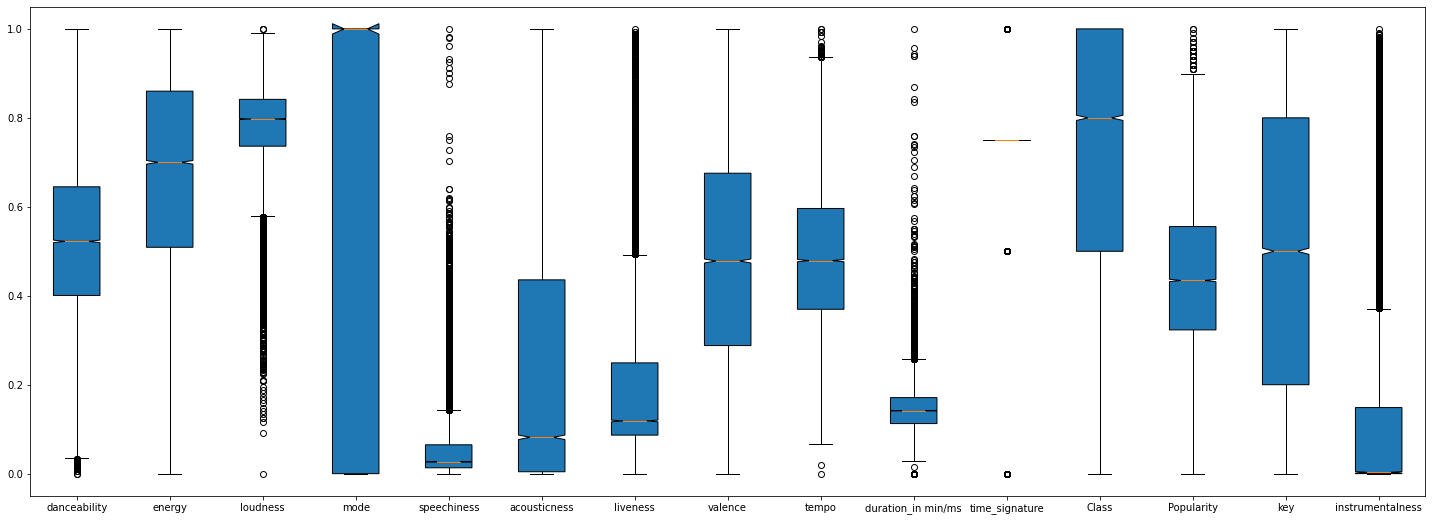

In [9]:

plt_1 = plt.figure(figsize=(25,9))
bp = plt.boxplot(outlier_check_array,
                patch_artist=True,
                notch=True)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],['danceability','energy','loudness','mode','speechiness','acousticness'
                       ,'liveness','valence','tempo','duration_in min/ms','time_signature','Class', 'Popularity', 'key','instrumentalness'])
plt.show()

As you can see, there is alot outliers, so my next step is to remove outliers using Z-Score

## Removing Outliers


In [10]:

z = np.abs(stats.zscore(assign_DF[['danceability','energy','loudness','mode','speechiness','acousticness'
                       ,'liveness','valence','tempo','duration_in min/ms','time_signature','Class', 'Popularity', 'key','instrumentalness']]))
z

,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Popularity,key,instrumentalness
0,1.867915,0.419671,0.727743,0.755294,0.373407,0.740387,0.698900,1.718614,0.387130,0.302284,0.210065,0.528955,0.888994,1.542871,0.551790
1,0.970946,0.642500,0.168104,0.755294,0.467934,0.791896,0.597774,0.344694,0.208629,0.455312,0.210065,1.030628,0.544080,0.920235,0.542941
2,0.658190,0.207237,0.104553,0.755294,0.325545,0.769157,1.242595,1.252314,0.847383,0.813293,0.210065,0.217038,0.548148,0.013718,0.555971
3,1.861901,0.279465,0.341479,1.323988,0.289648,0.727188,0.465870,0.344694,0.527221,0.239105,0.210065,0.528955,1.233908,1.258990,0.549125
4,2.264071,1.326539,0.896919,0.755294,1.630811,0.794893,0.151814,1.642078,2.584879,0.260886,0.210065,1.030628,0.486594,1.231553,0.501634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,2.270086,2.352824,2.269512,1.323988,0.459558,2.401358,0.614105,1.287357,1.655818,0.065137,2.555361,0.217038,0.548148,0.325036,2.258645
17992,0.568775,1.868474,0.558982,1.323988,0.560068,1.966748,0.789348,0.629541,1.677582,0.502943,0.210065,1.464705,1.008034,1.570308,0.556586
17993,0.087612,1.352031,0.797142,1.323988,0.101790,0.795342,2.951060,0.933469,0.595971,0.138210,0.210065,0.406795,0.605634,0.608918,0.556176
17994,1.975373,0.604262,1.196911,1.323988,0.649642,0.791285,0.375800,0.546273,0.295553,0.169205,0.210065,0.406795,0.893062,0.013718,2.572973


In [11]:
threshold = 3
print(np.where(z > 3))

(array([   34,    52,    67, ..., 17972, 17986, 17990], dtype=int64), array([ 2,  6,  4, ..., 10,  6,  2], dtype=int64))


In [12]:
df_o = assign_DF[(z < 3).all(axis=1)]

In [13]:
#This shows 1514 data got removed because they are outliers
print(assign_DF.shape)
print(df_o.shape)

(17996, 17)
(16482, 17)


In [14]:
df_o

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),0.595960,0.854745,0.563991,0.0,0.847024,1.0,0.027882,0.017169,0.001425,0.073879,0.910096,0.553969,0.158812,0.75,0.5
1,Boston,Hitch a Ride,0.535354,0.346890,0.813996,0.2,0.792166,1.0,0.019410,0.001104,0.004025,0.090173,0.569081,0.459689,0.170413,0.75,1.0
2,The Raincoats,No Side to Fall In,0.343434,0.402841,0.613992,0.5,0.765439,1.0,0.032172,0.487952,0.000196,0.386702,0.794358,0.626804,0.074240,0.75,0.6
3,Deno,Lingo (feat. J.I & Chunkz),0.656566,0.853669,0.596992,0.9,0.809161,0.0,0.035389,0.021285,0.002208,0.111426,0.569081,0.409271,0.117769,0.75,0.5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,0.525253,0.115558,0.974999,0.1,0.863607,1.0,0.207507,0.000170,0.016164,0.162028,0.075953,0.901766,0.155674,0.75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,0.343434,0.114482,0.108982,0.6,0.553223,0.0,0.020161,0.996988,0.827309,0.087542,0.163997,0.754740,0.130958,0.50,0.6
17992,Micatone,All Gone,0.262626,0.622337,0.222984,1.0,0.720895,0.0,0.011153,0.861446,0.000015,0.059306,0.327271,0.227225,0.174024,0.75,0.2
17993,Smash Hit Combo,Peine perdue,0.333333,0.536260,0.981000,0.3,0.853826,0.0,0.052225,0.000030,0.000136,0.661978,0.251834,0.398391,0.146374,0.75,0.8
17994,Beherit,Salomon's Gate,0.282828,0.167205,0.804996,0.5,0.658363,0.0,0.119571,0.001295,0.919679,0.247040,0.347938,0.539476,0.148724,0.75,0.8


In [15]:
outlier_check2 = df_o[['danceability','energy','loudness','mode','speechiness','acousticness'
                       ,'liveness','valence','tempo','duration_in min/ms','time_signature','Class', 'Popularity', 'key','instrumentalness']]

In [16]:
outlier_check_array2 = np.array(outlier_check2)


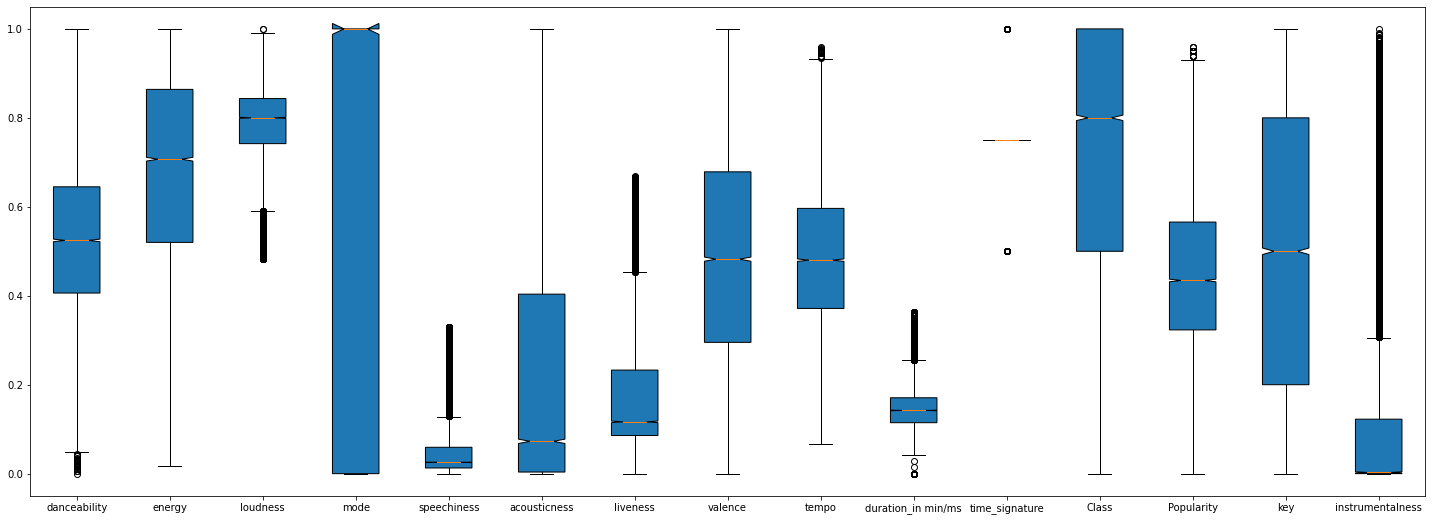

In [17]:

plt_1 = plt.figure(figsize=(25,9))
bp = plt.boxplot(outlier_check_array2,
                patch_artist=True,
                notch=True)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],['danceability','energy','loudness','mode','speechiness','acousticness'
                       ,'liveness','valence','tempo','duration_in min/ms','time_signature','Class', 'Popularity', 'key','instrumentalness'])
plt.show()

As you can see many outliers got removed. 

## Removing any datas with same artist name and track name

In [18]:
final_cleanDF = df_o.drop_duplicates(subset=['Artist Name','Track Name'], keep='last')
final_cleanDF

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),0.595960,0.854745,0.563991,0.0,0.847024,1.0,0.027882,0.017169,0.001425,0.073879,0.910096,0.553969,0.158812,0.75,0.5
1,Boston,Hitch a Ride,0.535354,0.346890,0.813996,0.2,0.792166,1.0,0.019410,0.001104,0.004025,0.090173,0.569081,0.459689,0.170413,0.75,1.0
2,The Raincoats,No Side to Fall In,0.343434,0.402841,0.613992,0.5,0.765439,1.0,0.032172,0.487952,0.000196,0.386702,0.794358,0.626804,0.074240,0.75,0.6
3,Deno,Lingo (feat. J.I & Chunkz),0.656566,0.853669,0.596992,0.9,0.809161,0.0,0.035389,0.021285,0.002208,0.111426,0.569081,0.409271,0.117769,0.75,0.5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,0.525253,0.115558,0.974999,0.1,0.863607,1.0,0.207507,0.000170,0.016164,0.162028,0.075953,0.901766,0.155674,0.75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,0.343434,0.114482,0.108982,0.6,0.553223,0.0,0.020161,0.996988,0.827309,0.087542,0.163997,0.754740,0.130958,0.50,0.6
17992,Micatone,All Gone,0.262626,0.622337,0.222984,1.0,0.720895,0.0,0.011153,0.861446,0.000015,0.059306,0.327271,0.227225,0.174024,0.75,0.2
17993,Smash Hit Combo,Peine perdue,0.333333,0.536260,0.981000,0.3,0.853826,0.0,0.052225,0.000030,0.000136,0.661978,0.251834,0.398391,0.146374,0.75,0.8
17994,Beherit,Salomon's Gate,0.282828,0.167205,0.804996,0.5,0.658363,0.0,0.119571,0.001295,0.919679,0.247040,0.347938,0.539476,0.148724,0.75,0.8


In [19]:
final_cleanDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14664 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         14664 non-null  object 
 1   Track Name          14664 non-null  object 
 2   Popularity          14664 non-null  float64
 3   danceability        14664 non-null  float64
 4   energy              14664 non-null  float64
 5   key                 14664 non-null  float64
 6   loudness            14664 non-null  float64
 7   mode                14664 non-null  float64
 8   speechiness         14664 non-null  float64
 9   acousticness        14664 non-null  float64
 10  instrumentalness    14664 non-null  float64
 11  liveness            14664 non-null  float64
 12  valence             14664 non-null  float64
 13  tempo               14664 non-null  float64
 14  duration_in min/ms  14664 non-null  float64
 15  time_signature      14664 non-null  float64
 16  Clas

# Data Understanding

In [28]:
# Dimention of dataset
print("Dataset is of ", final_cleanDF.ndim, " dimension.")
# Rows and column of dataset
print("Dataset has ", final_cleanDF.shape[0], " rows.","\nDataset has ", final_cleanDF.shape[1], " columns.")

Dataset is of  2  dimension.
Dataset has  14664  rows. 
Dataset has  17  columns.


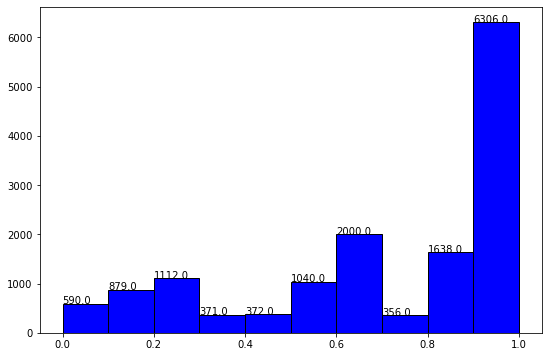

In [20]:
plt_1 = plt.figure(figsize=(9,6))
arr=plt.hist(final_cleanDF['Class'],
             facecolor='blue',
             edgecolor='black',
             bins=10)
for i in range(10):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

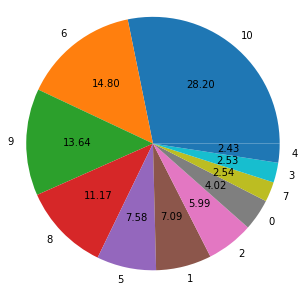

In [21]:
#This piechart shows the % of the datas belonging to each class. 
plt_1 = plt.figure(figsize=(5,5))
plt.pie(final_cleanDF['Class'].value_counts(normalize=True),
       labels=rename_dfKNN['Class'].value_counts(normalize=True).index,
       autopct='%.2f')
plt.axis('equal')
plt.show()

In [25]:
print("\n----------- Calculate Mean -----------\n")
print(drop_dataDF.mean())
 
print("\n----------- Calculate Median -----------\n")
print(drop_dataDF.median())
 
print("\n----------- Calculate Mode -----------\n")
print(drop_dataDF.mode())


----------- Calculate Mean -----------

Popularity            0.435711
danceability          0.525090
energy                0.664524
key                   0.492944
loudness              0.781375
mode                  0.636457
speechiness           0.051314
acousticness          0.248984
instrumentalness      0.155372
liveness              0.169329
valence               0.483874
tempo                 0.492177
duration_in min/ms    0.133835
time_signature        0.735202
Class                 0.677776
dtype: float64

----------- Calculate Median -----------

Popularity            0.434343
danceability          0.526038
energy                0.696994
key                   0.500000
loudness              0.798182
mode                  1.000000
speechiness           0.025308
acousticness          0.086044
instrumentalness      0.002690
liveness              0.115474
valence               0.476077
tempo                 0.478808
duration_in min/ms    0.142038
time_signature        0.750000
Cl

In [26]:
print("\n----------- Calculate Max -----------\n")
print(drop_dataDF.max())
 
print("\n----------- Calculate Min -----------\n")
print(drop_dataDF.min())
 


----------- Calculate Max -----------

Popularity            0.959596
danceability          1.000000
energy                1.000000
key                   1.000000
loudness              0.999685
mode                  1.000000
speechiness           0.329759
acousticness          1.000000
instrumentalness      1.000000
liveness              0.669062
valence               1.000000
tempo                 0.959804
duration_in min/ms    0.363005
time_signature        1.000000
Class                 1.000000
dtype: float64

----------- Calculate Min -----------

Popularity            0.000000e+00
danceability          3.227889e-04
energy                1.708005e-02
key                   0.000000e+00
loudness              4.819764e-01
mode                  0.000000e+00
speechiness           0.000000e+00
acousticness          0.000000e+00
instrumentalness      0.000000e+00
liveness              0.000000e+00
valence               0.000000e+00
tempo                 6.635485e-02
duration_in min/ms  

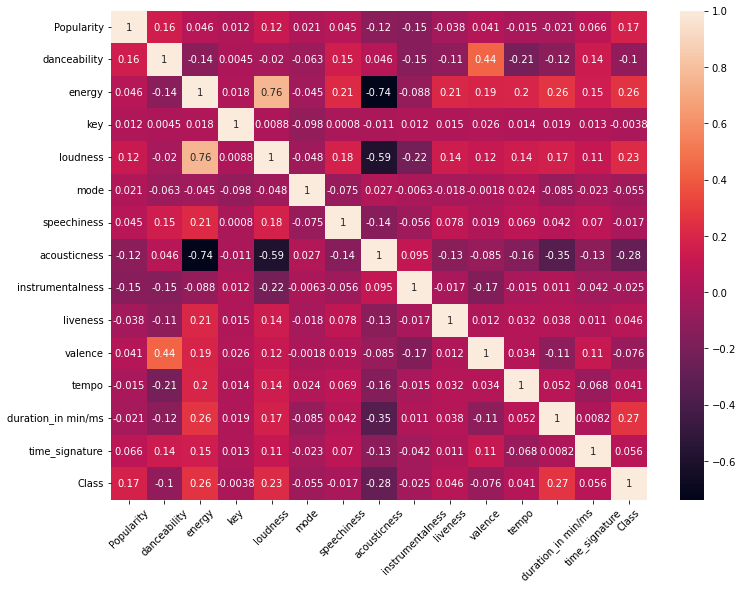

In [42]:
# Creating the correaltion matrix
corr = final_cleanDF.corr()
# Plotting the correlation matrix on a heatmap
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.show()

## Remove columns not needed for training model

In [24]:
drop_dataDF = final_cleanDF.drop(['Artist Name', 'Track Name'], axis=1)
drop_dataDF

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0.595960,0.854745,0.563991,0.0,0.847024,1.0,0.027882,0.017169,0.001425,0.073879,0.910096,0.553969,0.158812,0.75,0.5
1,0.535354,0.346890,0.813996,0.2,0.792166,1.0,0.019410,0.001104,0.004025,0.090173,0.569081,0.459689,0.170413,0.75,1.0
2,0.343434,0.402841,0.613992,0.5,0.765439,1.0,0.032172,0.487952,0.000196,0.386702,0.794358,0.626804,0.074240,0.75,0.6
3,0.656566,0.853669,0.596992,0.9,0.809161,0.0,0.035389,0.021285,0.002208,0.111426,0.569081,0.409271,0.117769,0.75,0.5
4,0.525253,0.115558,0.974999,0.1,0.863607,1.0,0.207507,0.000170,0.016164,0.162028,0.075953,0.901766,0.155674,0.75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,0.343434,0.114482,0.108982,0.6,0.553223,0.0,0.020161,0.996988,0.827309,0.087542,0.163997,0.754740,0.130958,0.50,0.6
17992,0.262626,0.622337,0.222984,1.0,0.720895,0.0,0.011153,0.861446,0.000015,0.059306,0.327271,0.227225,0.174024,0.75,0.2
17993,0.333333,0.536260,0.981000,0.3,0.853826,0.0,0.052225,0.000030,0.000136,0.661978,0.251834,0.398391,0.146374,0.75,0.8
17994,0.282828,0.167205,0.804996,0.5,0.658363,0.0,0.119571,0.001295,0.919679,0.247040,0.347938,0.539476,0.148724,0.75,0.8


In [29]:
X = drop_dataDF[drop_dataDF.columns[:-1]] #data.columns[:-1] = All columns excluding the last
Y = drop_dataDF[drop_dataDF.columns[-1:]] #data.columns[-1] = The last columns 

In [30]:
X.info()
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14664 entries, 0 to 17995
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Popularity          14664 non-null  float64
 1   danceability        14664 non-null  float64
 2   energy              14664 non-null  float64
 3   key                 14664 non-null  float64
 4   loudness            14664 non-null  float64
 5   mode                14664 non-null  float64
 6   speechiness         14664 non-null  float64
 7   acousticness        14664 non-null  float64
 8   instrumentalness    14664 non-null  float64
 9   liveness            14664 non-null  float64
 10  valence             14664 non-null  float64
 11  tempo               14664 non-null  float64
 12  duration_in min/ms  14664 non-null  float64
 13  time_signature      14664 non-null  float64
dtypes: float64(14)
memory usage: 1.7 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14664 entries, 0

In [31]:
col_one_list = drop_dataDF['Class'].tolist()

In [32]:


lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(col_one_list)

## Splitting Data into training and testing set

In [33]:

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

## No1. Decision Tree

In [34]:
#Enter your codes here to train a DecisionTreeClassifier
tr = DecisionTreeClassifier(random_state=42)
tr.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=42)

In [35]:
tr.get_depth()

29

In [36]:
feature_impt = pd.Series(tr.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_impt

acousticness          0.121069
duration_in min/ms    0.118356
speechiness           0.093228
Popularity            0.093081
instrumentalness      0.086637
valence               0.085575
danceability          0.082659
energy                0.077838
loudness              0.073508
tempo                 0.058795
liveness              0.057002
key                   0.033641
mode                  0.013053
time_signature        0.005558
dtype: float64

No handles with labels found to put in legend.


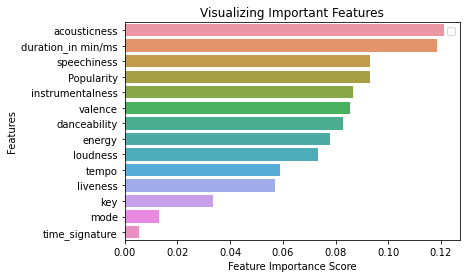

In [37]:

%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_impt, y=feature_impt.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [38]:

target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9', 'class 10']

print("Decison Tree:")

print("Confusion Matrix:")
print(confusion_matrix(Y_test, tr.predict(X_test)))

print('')

print("Classification Report")
print(classification_report(Y_test, tr.predict(X_test), target_names=target_names))

Decison Tree:
Confusion Matrix:
[[ 68   0   0  17  11   0   0   8   0   8   6]
 [  0  16  15   0   0  17  34   0  11  28  55]
 [  0  12  59   0   0   9  39   0   8  33  63]
 [ 12   0   0  44   6   0   0   5   0   2   5]
 [ 14   0   0   5  36   0   0   1   0  12   6]
 [  0  11   7   0   0 105  36   0   3  33  13]
 [  0  36  33   0   0  27 103   0  28  71 102]
 [  3   0   0   4   3   0   0  60   0   0   1]
 [  0  18   8   0   0   2  30   0 167  17  86]
 [  9  32  39   1  13  33  50   2   5 169  81]
 [  7  72  62   1   5  31 115   0  97  86 351]]

Classification Report
              precision    recall  f1-score   support

     class 0       0.60      0.58      0.59       118
     class 1       0.08      0.09      0.09       176
     class 2       0.26      0.26      0.26       223
     class 3       0.61      0.59      0.60        74
     class 4       0.49      0.49      0.49        74
     class 5       0.47      0.50      0.49       208
     class 6       0.25      0.26      0.26     

In [39]:
print("Accuracy Score:")
print(accuracy_score(Y_test, tr.predict(X_test)))

Accuracy Score:
0.40163654960791


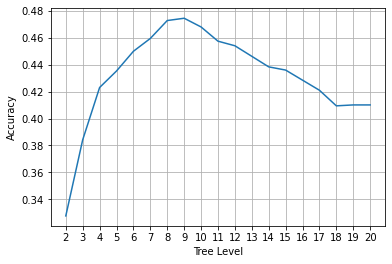

In [40]:

acc = []
for i in range(2, 21):
    tr = DecisionTreeClassifier(random_state=42, max_depth=i)
    tr.fit(X_train, Y_train)
    acc.append(accuracy_score(Y_test,tr.predict(X_test)))

plt.xticks(range(0,21))
plt.plot(range(2, 21), acc)
plt.ylabel('Accuracy')
plt.xlabel('Tree Level')
plt.grid(True)
plt.show()

Based on the plot, we can see that as we increase the depth from 2, the accuracy of the prediction increases. However, once pass a certain point, the improvement stops and the accuracy actually becomes worse. This shows that we have start to overfit. So the best result for accuracy is around a depth of 9.

Restricting Tree Growth

In [41]:
#Enter your codes to train a tree with maximum depth of 9
tr2 = DecisionTreeClassifier(random_state=42, max_depth=9)
tr2.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=9, random_state=42)

In [42]:

target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9', 'class 10']

print("Decison Tree:")

print("Confusion Matrix:")
print(confusion_matrix(Y_test, tr2.predict(X_test)))

print('')

print("Classification Report")
print(classification_report(Y_test, tr2.predict(X_test), target_names=target_names))

Decison Tree:
Confusion Matrix:
[[ 77   0   0  15  16   0   0   4   0   3   3]
 [  0   5  10   0   0  11  36   0   7  28  79]
 [  0   1  61   0   0   3  39   0   3  40  76]
 [ 18   0   0  40   8   0   0   6   0   0   2]
 [ 19   0   0   4  38   0   0   0   0  11   2]
 [  0   1   7   0   0 124  31   0   0  27  18]
 [  0   3  23   0   0  20 121   0  11  71 151]
 [  3   0   0   5   3   0   0  59   0   0   1]
 [  0   0   7   0   0   1  19   0 158   5 138]
 [ 11   1  26   0  14  31  41   1   1 202 106]
 [  5   2  43   0  13  17  83   0  59  98 507]]

Classification Report
              precision    recall  f1-score   support

     class 0       0.58      0.65      0.61       118
     class 1       0.38      0.03      0.05       176
     class 2       0.34      0.27      0.31       223
     class 3       0.62      0.54      0.58        74
     class 4       0.41      0.51      0.46        74
     class 5       0.60      0.60      0.60       208
     class 6       0.33      0.30      0.31     

In [43]:
print("Accuracy Score:")
print(accuracy_score(Y_test, tr2.predict(X_test)))

Accuracy Score:
0.47459938629389703


## No2. LogisticRegression

In [44]:
#Create a LogisticRegression classifier and fit the training data
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [45]:
y_pred = lr.predict(X_test)

In [46]:
print("Logistic Regression:")

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

print('')

print("Classification Report")
print(classification_report(Y_test, y_pred, target_names=target_names))

Logistic Regression:
Confusion Matrix:
[[ 75   0   1   7   8   0   4   3   1  14   5]
 [  0   0   9   0   0   9  16   4  10  22 106]
 [  0   0  84   0   0   3  19   1   2  26  88]
 [ 14   0   0  46   0   0   0   3   0   9   2]
 [ 16   0   0   4  34   0   0   0   0  16   4]
 [  0   0   7   0   0 123  14   0   0  42  22]
 [  1   0  15   1   0  28  73   5  24  66 187]
 [  8   0   0   3   0   0   1  56   0   2   1]
 [  0   0   2   0   0   0  10   0 171   2 143]
 [  4   0  19   2  12  34  20   1   3 190 149]
 [  2   0  41   3  12   7  26   0  76  67 593]]

Classification Report
              precision    recall  f1-score   support

     class 0       0.62      0.64      0.63       118
     class 1       0.00      0.00      0.00       176
     class 2       0.47      0.38      0.42       223
     class 3       0.70      0.62      0.66        74
     class 4       0.52      0.46      0.49        74
     class 5       0.60      0.59      0.60       208
     class 6       0.40      0.18      0.

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:

print(accuracy_score(Y_test,y_pred))

0.49266962154790317


# No3. K-Nearest Neighbour

I have to find the best value for K in KNN classification algorithm

Minimum error:- 0.5560859188544153 at K = 30


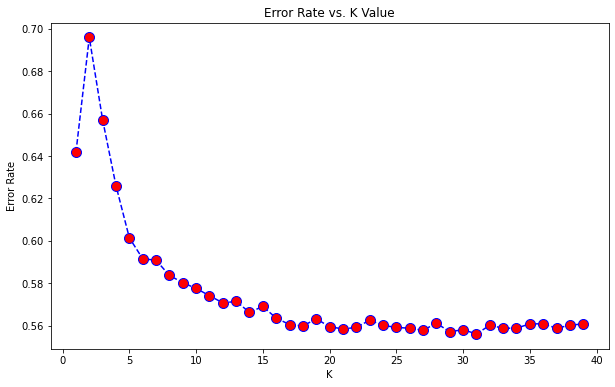

In [48]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.4439140811455847 at K = 30


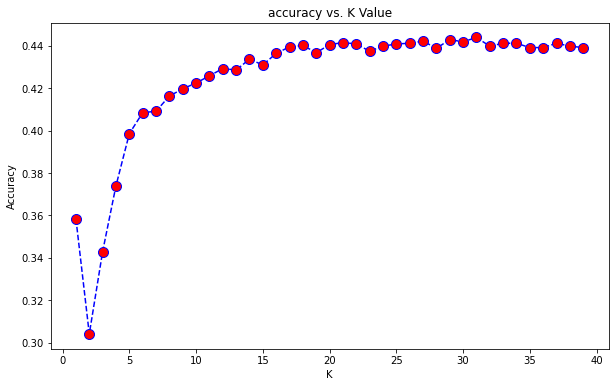

In [49]:
acc = []
# Will take some time
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Since at K=30, it has the best accuracy, K will be 30

In [50]:
k=30
knn_clf=KNeighborsClassifier(n_neighbors = k)
knn_clf.fit(X_train,Y_train)
ypred=knn_clf.predict(X_test)

In [51]:
print("KNN Classifier: ")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, ypred))

print('')

print("Classification Report:")
print(classification_report(Y_test, ypred))

KNN Classifier: 
Confusion Matrix:
[[ 48   1  17   2   2   0  11   2   3  19  13]
 [  1   1   8   0   0   7  22   6   8  20 103]
 [  5   1  58   1   0   1  16   6   4  48  83]
 [  8   2  10  29   2   0   2   4   0   9   8]
 [ 11   1   5   0  14   0   2   0   0  16  25]
 [  1   1   8   0   0  79  23   0   0  65  31]
 [  8   0  14   0   0  10  86   7  23  79 173]
 [  5   1   2   0   0   0   2  56   0   4   1]
 [  0   0   2   0   0   0   8   1 163   3 151]
 [ 13   2  12   1   2  23  38   4   7 190 142]
 [ 11   1  19   3   1   2  34   2  84  98 572]]

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.41      0.42       118
           1       0.09      0.01      0.01       176
           2       0.37      0.26      0.31       223
           3       0.81      0.39      0.53        74
           4       0.67      0.19      0.29        74
           5       0.65      0.38      0.48       208
           6       0.35      0.21      0.27 

In [52]:

print("Accuracy Score:")
print(accuracy_score(Y_test, ypred))

Accuracy Score:
0.44186839413569723


# No4. Naive Bayes

In [53]:
#Import Gaussian Naive Bayes model

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, Y_train)

#Predict the response for test dataset
y_predict = gnb.predict(X_test)

In [54]:
print('Naive Bayes:')
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_predict))

print('')

print("Classification Report")
print(classification_report(Y_test, y_predict))

Naive Bayes:
Confusion Matrix:
[[ 83   0   0  12  16   0   0   7   0   0   0]
 [  0   0  10   0   0   9  22   0  27  18  90]
 [  0   0  90   0   0   3  15   0  15  30  70]
 [ 16   0   0  42  12   0   0   4   0   0   0]
 [ 18   0   0   2  54   0   0   0   0   0   0]
 [  0   0   6   0   0 138  13   0   4  32  15]
 [  0   0  38   0   0  34  84   0  52  53 139]
 [  7   0   0   5   0   0   0  59   0   0   0]
 [  0   0   9   0   0   0  10   0 232   0  77]
 [ 13   0  51   7  32  49  25   1   8 122 126]
 [ 11   0  75   3  20  17  41   0 197  63 400]]

Classification Report
              precision    recall  f1-score   support

           0       0.56      0.70      0.62       118
           1       0.00      0.00      0.00       176
           2       0.32      0.40      0.36       223
           3       0.59      0.57      0.58        74
           4       0.40      0.73      0.52        74
           5       0.55      0.66      0.60       208
           6       0.40      0.21      0.28      

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
print("Accuracy Score:")
print(accuracy_score(Y_test, y_predict))

Accuracy Score:
0.44459597681554724


# No5. Random Forest


In [56]:
# Building  Random Forest Classifier

rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

In [57]:
# Evaluating on Training set

print('Random Forest:')
print("Confusion Matrix:")
print(confusion_matrix(Y_test, rfc.predict(X_test)))

print('')

print("Classification Report")
print(classification_report(Y_test, rfc.predict(X_test), target_names=target_names))

Random Forest:
Confusion Matrix:
[[ 98   0   0   8   9   0   0   3   0   0   0]
 [  0   6   5   0   0   8  26   0   5  25 101]
 [  0   1  82   0   0   4  28   0   1  33  74]
 [ 15   0   0  49   5   0   0   2   0   2   1]
 [ 15   0   0   3  44   0   0   0   0  11   1]
 [  0   1   4   0   0 141  12   0   0  33  17]
 [  0   3  15   0   0  31 116   0  14  48 173]
 [  6   0   0   5   0   0   0  59   0   1   0]
 [  0   0   1   0   0   0  13   0 177   3 134]
 [  4   0  18   0  11  38  34   1   0 223 105]
 [  1   1  29   5  10  11  59   0  59  61 591]]

Classification Report
              precision    recall  f1-score   support

     class 0       0.71      0.83      0.76       118
     class 1       0.50      0.03      0.06       176
     class 2       0.53      0.37      0.44       223
     class 3       0.70      0.66      0.68        74
     class 4       0.56      0.59      0.58        74
     class 5       0.61      0.68      0.64       208
     class 6       0.40      0.29      0.34    

In [58]:
print("Accuracy Score:")
print(accuracy_score(Y_test, rfc.predict(X_test)))

Accuracy Score:
0.5407432662802591


In [59]:

feature_imp = pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

duration_in min/ms    0.122893
acousticness          0.108826
speechiness           0.092014
danceability          0.089197
energy                0.087632
valence               0.082542
Popularity            0.079689
loudness              0.078968
instrumentalness      0.077154
tempo                 0.063702
liveness              0.059929
key                   0.038563
mode                  0.012837
time_signature        0.006053
dtype: float64

No handles with labels found to put in legend.


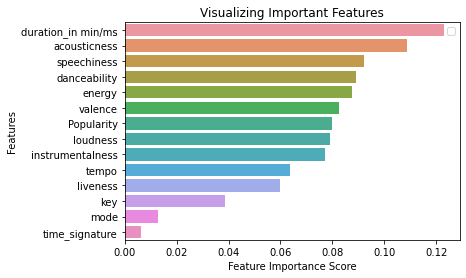

In [60]:

%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# No6. Gradient Boost

In [61]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.4074326628025912

In [62]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, Y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, Y_test)))
    print('')

Learning rate:  0.05
Accuracy score (training): 0.372
Accuracy score (validation): 0.369

Learning rate:  0.075
Accuracy score (training): 0.436
Accuracy score (validation): 0.421

Learning rate:  0.1
Accuracy score (training): 0.472
Accuracy score (validation): 0.451

Learning rate:  0.25
Accuracy score (training): 0.529
Accuracy score (validation): 0.498

Learning rate:  0.5
Accuracy score (training): 0.545
Accuracy score (validation): 0.507

Learning rate:  0.75
Accuracy score (training): 0.050
Accuracy score (validation): 0.052

Learning rate:  1
Accuracy score (training): 0.110
Accuracy score (validation): 0.115



In [78]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, Y_train)
predictions = gb_clf2.predict(X_test)

print('Gradient Boost:')
print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

print('')

print("Classification Report")
print(classification_report(Y_test, predictions))

Gradient Boost:
Confusion Matrix:
[[ 78   1   0  13  11   0   0   4   0  11   0]
 [  0   1   4   0   0  10  28   2   6  25 100]
 [  0   1  77   4   0   1  27   0   4  23  86]
 [ 22   0   0  34   6   0   0   3   0   8   1]
 [ 14   0   0   3  46   0   0   0   0   8   3]
 [  1   1  13   0   0 126  16   0   0  37  14]
 [  0   2  13   3   0  28 106   1  15  60 172]
 [  6   0   0   3   0   0   0  60   0   1   1]
 [  0   1   5   0   0   0  10   1 175   2 134]
 [  5   2  18   4  13  38  32   0   3 206 113]
 [  3   3  26   4  24  11  43   0  70  65 578]]

Classification Report
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       118
           1       0.08      0.01      0.01       176
           2       0.49      0.35      0.41       223
           3       0.50      0.46      0.48        74
           4       0.46      0.62      0.53        74
           5       0.59      0.61      0.60       208
           6       0.40      0.27      0.32   

In [64]:
print("Accuracy Score:")
print(accuracy_score(Y_test, predictions))

Accuracy Score:
0.5069894306171155


# Doing some Prediction

In [65]:

predict_dataDF = pd.DataFrame(np.random.uniform(0.0, 0.9, size=(100, 14)), columns=['danceability','energy','loudness','mode','speechiness','acousticness'
                       ,'liveness','valence','tempo','duration_in min/ms','time_signature', 'Popularity', 'key','instrumentalness'])

predict_dataDF


,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Popularity,key,instrumentalness
0,0.355384,0.235633,0.633697,0.827539,0.800582,0.021570,0.245979,0.194250,0.062255,0.772373,0.573971,0.704850,0.840278,0.512977
1,0.757407,0.258199,0.368751,0.175418,0.024906,0.306051,0.882837,0.368993,0.775641,0.468486,0.272841,0.613601,0.398336,0.095143
2,0.855486,0.495662,0.825352,0.395996,0.697193,0.838584,0.467912,0.462328,0.863503,0.684967,0.391955,0.707799,0.158878,0.456010
3,0.053544,0.073880,0.882622,0.543028,0.645766,0.517475,0.616583,0.345384,0.671206,0.827273,0.400823,0.728026,0.370260,0.467787
4,0.519107,0.697619,0.807308,0.797735,0.685153,0.071868,0.830999,0.085879,0.265893,0.009355,0.478248,0.588631,0.067822,0.521156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.531882,0.072516,0.801909,0.427408,0.264864,0.483587,0.464062,0.519840,0.638047,0.744030,0.234344,0.313496,0.197629,0.834923
96,0.475103,0.408296,0.483347,0.624854,0.357145,0.800608,0.722780,0.468725,0.007786,0.614684,0.437570,0.559149,0.799580,0.537215
97,0.349433,0.784000,0.562562,0.194957,0.229707,0.874591,0.118209,0.566169,0.840112,0.209245,0.821973,0.465629,0.614548,0.448586
98,0.514924,0.605179,0.505943,0.353976,0.154803,0.237276,0.588245,0.344048,0.114795,0.489378,0.574486,0.445938,0.355603,0.761988


Using Decision Tree

In [66]:
DT_pred = tr.predict(predict_dataDF)

In [67]:
print(DT_pred)

[ 9  5  9  6  5  5  5  9  5  5  5  9  1  2  2  5  9  5  9  9  2 10  1  6
  7  5  2  5  2  2  5  2  2  6  5  5  6  9  5  5  9 10  6  5  6  5  5  1
  5  8  5  1  9  9  9  5  2 10 10  2 10  9  9  2 10  5  9  9 10  5  3  2
  5  6  2  5  0  5  5  9  5  5  5  6  2  6  6  5  1  5  5 10  9  5  5  5
  1  2  9  5]


Using Logistic Regression

In [68]:
LR_pred = lr.predict(predict_dataDF)

In [69]:
print(LR_pred)

[ 2  5  5  8  5  8  2  5  5  2  2  5 10  2  5  5  5  2  2  5  5  2 10  5
  3  8 10  2  7  2  8  5  2  8  5  5  8  5  2  5  2 10  2  5  8  5  2  8
  8  5  2  5  5  2  5  2  2  2  5  5  5  2  5  5  2  8  5  5  5  8  7  2
  5  5  5  2  3  2  5  2  7  8  5 10  2  2  8  5  2  5  5  2  2  5  2  8
  5  2  5  2]


Using KNN Classification

In [82]:
KNN_pred=knn_clf.predict(predict_dataDF)

In [83]:
print(KNN_pred)

[10 10 10  8  5  8  5  9  8  6 10  6  6  2  9  5  5  9 10  5  5  6 10  5
  6 10 10  2  2  2  8  6  2  8  6  8  8  2  2  6  2 10 10  9  6 10 10 10
 10  8  2  2  5 10  5  2 10  2  9 10  6 10  9  5  2 10  5  5 10  8 10  2
  6  5  6 10 10 10 10 10  7  8 10 10 10 10  8  5  2  3  5 10 10  5  6 10
 10  2  5  2]


Using Naive Bayes

In [84]:
NB_pred = gnb.predict(predict_dataDF)

In [86]:
print(NB_pred)

[ 8  5  5  5  5  2  9  5  9  5  9  5  6  2  9  5  6  2  2  5  5  9 10  5
  2  9 10  2  2  2  8  9  2  8  8  5  8  2  2  5  9 10  9  9  2  8  8  2
  9  8  2  9  9  8  5  9 10 10  5  5  8  2  8  5  2  9  5  9  5  8  6  2
  2  5  9  6  2  9  5  2  6  2  5  2  6  2  2  5  2  5  5  2  2  9  8  5
  9  2  5  6]


Using Random Forest

In [74]:
RF_pred = rfc.predict(predict_dataDF)

In [75]:
print(RF_pred)

[ 2  6  5  6  5 10  5  2  5  6  5  5  6  2  5  5  5  5 10  5  5  6  6  5
  3  5 10  5  9  2  6  5  6  6  5  5  6  5 10  9  2 10  6  5  5  5  2  1
  6  6  5  9  5  5 10  5 10  6  5  6  5  9  9  5 10 10  2  5 10  6  3  5
  5  5 10  6  0  5  6  2  9  5  5 10  2 10  6  5  2 10  6  2 10  5  5  5
  5  2  5  2]


Using Gradient Boost

In [76]:
GB_pred = gb_clf2.predict(predict_dataDF)

In [77]:
print(GB_pred)

[ 1  2  1  1  5  1  1  5  5  1  5  1 10  1  1  7  1  0  1  7  7  5  1  1
  4  1  2  2  2  4  7  1  5  6  1  5  1  2  1  6  2  1  2  0  1  5  7  4
  4  1  5  4  0  1  4  2  1  2  5  3  3  0  9  1  2  2  1  2  2  1  4  4
  7  1  2  7  9  1  5  2  3  1  4  4  6  4  1  2  4  4  8  2  5  5  5  1
  4  4  2  2]
